<a href="https://colab.research.google.com/github/2303A52247/PNS/blob/main/PNS_Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

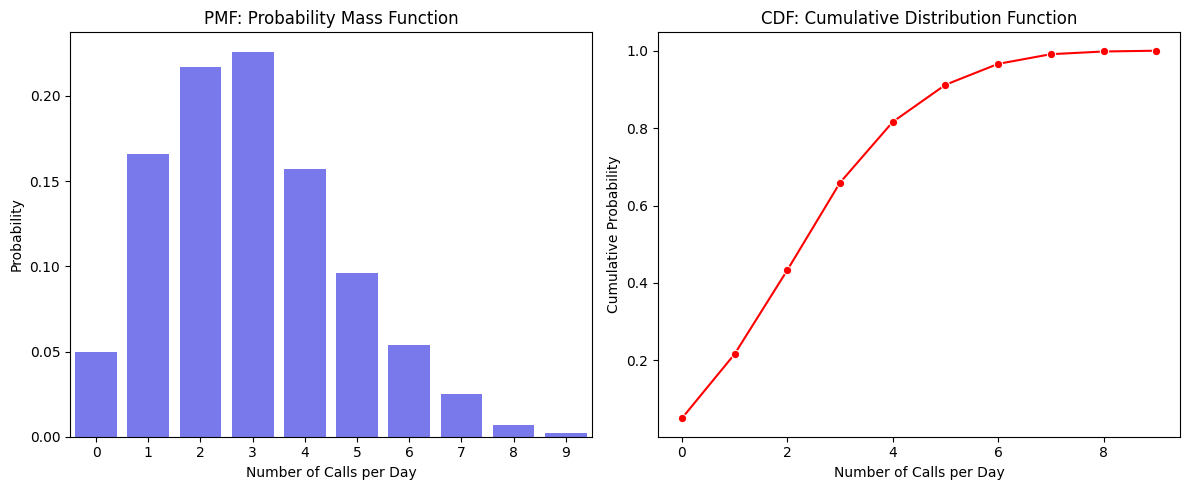

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

np.random.seed(42)

N = 1000

calls_per_day = np.random.poisson(lam=3, size=N)

call_counts = Counter(calls_per_day)
total_days = sum(call_counts.values())

pmf = {k: v / total_days for k, v in sorted(call_counts.items())}

sorted_keys = sorted(pmf.keys())
cdf = {}
cumulative_prob = 0

for k in sorted_keys:
    cumulative_prob += pmf[k]
    cdf[k] = cumulative_prob

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=list(pmf.keys()), y=list(pmf.values()), ax=ax[0], color='blue', alpha=0.6)
ax[0].set_xlabel("Number of Calls per Day")
ax[0].set_ylabel("Probability")
ax[0].set_title("PMF: Probability Mass Function")

sns.lineplot(x=list(cdf.keys()), y=list(cdf.values()), marker='o', ax=ax[1], color='red')
ax[1].set_xlabel("Number of Calls per Day")
ax[1].set_ylabel("Cumulative Probability")
ax[1].set_title("CDF: Cumulative Distribution Function")

plt.tight_layout()
plt.show()


In [11]:
from scipy.stats import binom

N = 100
p = 0.25

prob_20 = binom.pmf(20, N, p)
prob_30_or_more = 1 - binom.cdf(29, N, p)
expected_value = N * p

print(f"The probability that exactly 20 patients need surgery: {prob_20:.4%}")
print(f"The probability that at least 30 patients need surgery: {prob_30_or_more:.4%}")
print(f"On average, the hospital should expect {expected_value} patients to need surgery per day.")

The probability that exactly 20 patients need surgery: 4.9301%
The probability that at least 30 patients need surgery: 14.9541%
On average, the hospital should expect 25.0 patients to need surgery per day.
